
**Companion for Intuitive Deep Learning 
Part 1 (Annotated)**

*Jessica Coffel*


*Program author credit: josephlee94*

In this notebook, we'll go through the code for the coding companion for Intuitive Deep Learning Part 1 (Part 1a, Part 1b) to create your very first neural network to predict whether the house price is below or above median value. We will go through the following in this notebook:

* Exploring and Processing the Data


* Building and Training our Neural Network


* Visualizing Loss and Accuracy


* Adding Regularization to our Neural Network

**Exploring and Processing the Data**

In [5]:
import pandas as pd

In [2]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Now we will convert the datafrom into an array by accessing its values

In [6]:
dataset = df.values

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Now we split the dataset into our input features and the label we wish to predict

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

We must normalize our data so the input features are on the same order of magitude to make training easier. To do this we will use the min-max scaler from scikit-learn which will scale the data to be between 0 and 1

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now we will set aside parts of our data for a validation set and a test set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Building and Training Our First Neural Network**

We will use Keras to build the architecture. 

In [20]:
from keras.models import Sequential
from keras.layers import Dense

We will use the Sequential model, which means we only need to describe the layers above in sequence. Our neural network has three layers:

* Hidden layer 1: 30 neurons, ReLU activation

* Hidden layer 2: 30 neurons, ReLU activation

* Output layer: 1 neuron, Sigmoid activation

In [23]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape=(10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

C:\Users\kucht\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that the architecture is specified, we need to find the best numbers for it. We have to configure the model by:

* Telling it what algorith you want to use to do the optimization(we will use stochastic gradient descent)

* Telling it what loss function to use(for binary classification, we will use binary cross entropy)

* Telling it what other metrics you want to track apart from the loss function(we are goign to track accuracy)

In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
                

Training on the data requires one line of code. The funciton is called 'fit' as we are fitting the parameters to the data. We will specify:

* what data we are training on (X_train and Y_train)

* the size of our mini-batch

* how long we want to train for(epochs)

* what our validation data is so that the model will tell us how we are doing on the validation data at each point


In [25]:
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4628 - loss: 0.6990 - val_accuracy: 0.5205 - val_loss: 0.6938
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5020 - loss: 0.6930 - val_accuracy: 0.5114 - val_loss: 0.6888
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5039 - loss: 0.6880 - val_accuracy: 0.5068 - val_loss: 0.6844
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5186 - loss: 0.6828 - val_accuracy: 0.5251 - val_loss: 0.6797
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5421 - loss: 0.6780 - val_accuracy: 0.5297 - val_loss: 0.6760
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5685 - loss: 0.6743 - val_accuracy: 0.5662 - val_loss: 0.6728
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6096 - loss: 0.6710 - val_accuracy: 0.6119 - val_loss: 0.6698
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6556 - loss: 0.6678 - val_accuracy: 0.

Evaluation of our data on the test set

In [26]:
model.evaluate(X_test,Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8904 - loss: 0.2653


0.8904109597206116

**Visualizing Loss and Accuracy**

In [27]:
import matplotlib.pyplot as plt

Visualizing loss

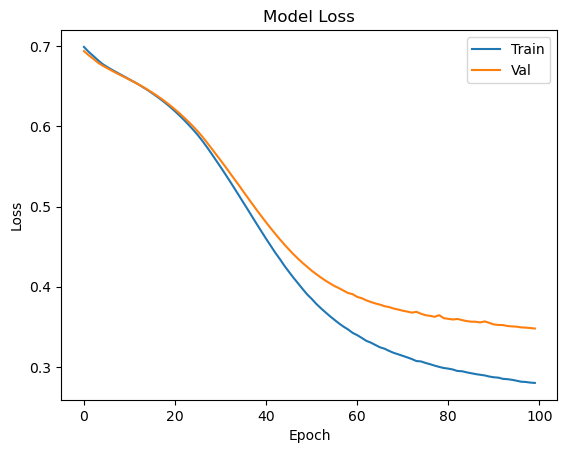

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()
         

Visualizing accuracy

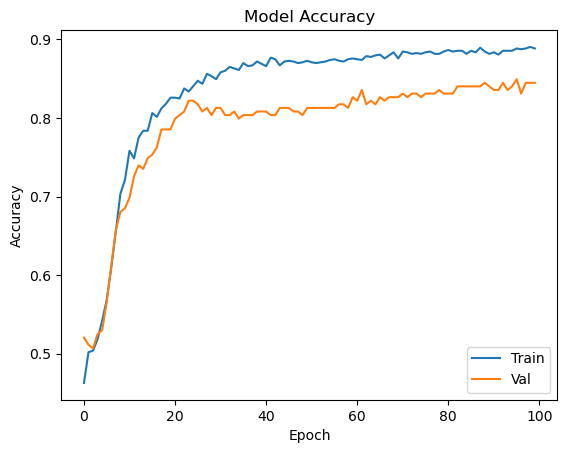

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'lower right')
plt.show()

**Adding Regularization to our Neural Network**

We will now train a model which will overfit

In [32]:
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape=(10,)),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model_2.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

C:\Users\kucht\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7701 - loss: 0.4859 - val_accuracy: 0.8082 - val_loss: 0.4210
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8591 - loss: 0.3467 - val_accuracy: 0.8402 - val_loss: 0.3847
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8816 - loss: 0.3041 - val_accuracy: 0.8539 - val_loss: 0.3536
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8836 - loss: 0.3003 - val_accuracy: 0.8813 - val_loss: 0.3595
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8875 - loss: 0.2853 - val_accuracy: 0.8767 - val_loss: 0.3275
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8865 - loss: 0.2708 - val_accuracy: 0.8676 - val_loss: 0.3473
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8924 - loss: 0.2620 - val_accuracy: 0.8813 - val_loss: 0.3372
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9012 - loss: 0.2676 - val_accuracy: 0.

Visualization of loss with overfitting:

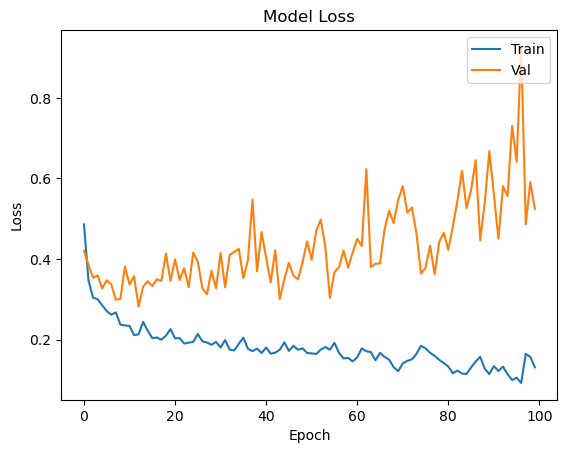

In [34]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Visualization of accuracy with overfitting:

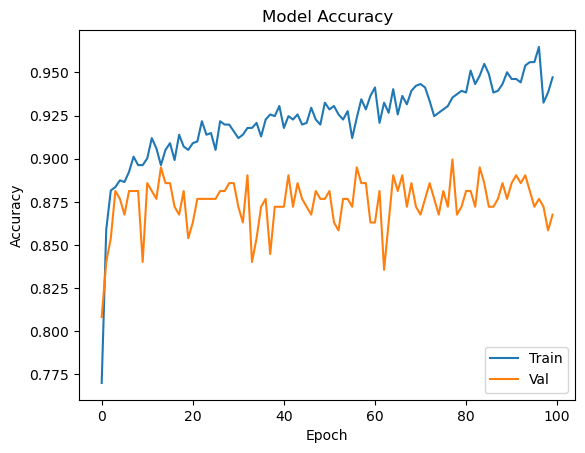

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

To address the overfitting in this model we will incorporate a L2 regularization and dropout. We will call that model model 3

In [36]:
from keras.layers import Dropout
from keras import regularizers

In [37]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

C:\Users\kucht\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
                     batch_size=32, epochs=100,
                     validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.6008 - loss: 14.2493 - val_accuracy: 0.7397 - val_loss: 3.9026
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8229 - loss: 1.6756 - val_accuracy: 0.8447 - val_loss: 0.6982
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8434 - loss: 0.5891 - val_accuracy: 0.7854 - val_loss: 0.6418
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8718 - loss: 0.5133 - val_accuracy: 0.8539 - val_loss: 0.5282
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8699 - loss: 0.4837 - val_accuracy: 0.8493 - val_loss: 0.5114
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8767 - loss: 0.4877 - val_accuracy: 0.8174 - val_loss: 0.5786
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8787 - loss: 0.4836 - val_accuracy: 0.8630 - val_loss: 0.5128
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8699 - loss: 0.4886 - val_accuracy: 0

We will now plot the loss and accuracy for model 3. The loss is a lot higher at the start due to the change in loss function. We will zoom in to plot this model with an additional line of code(plt.ylim)

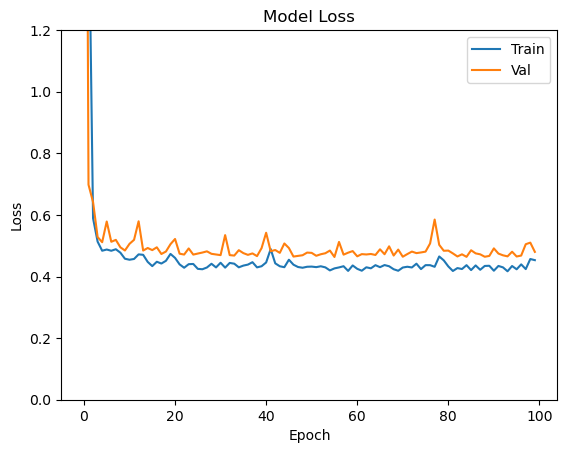

In [39]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

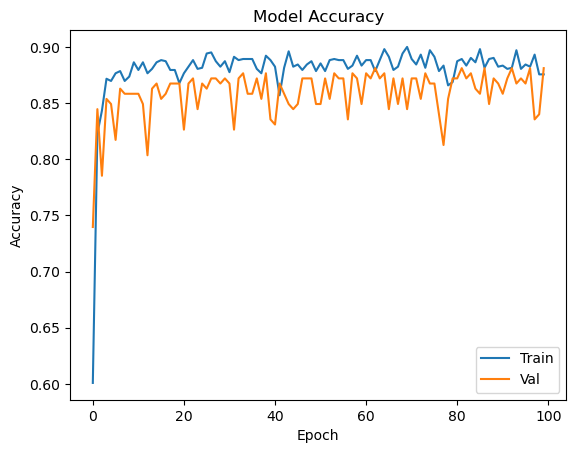

In [40]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Looking at model 3 compared to model 2, you will see less overfitting. 